<a href="https://colab.research.google.com/github/MdelaVilla/MORS/blob/main/MORS_Session4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Recursos no supervisados

In [ ]:
!pip install afinn
# initialize afinn sentiment analyzer
from afinn import Afinn
import numpy as np
import pandas as pd



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=9692b82527d9678523ff64a06cb6d873ca57b236d4776941976447e59adbca69
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
afinn = Afinn()
afinn.score('This is utterly excellent!')

3.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = ('/content/drive/MyDrive/Colab Notebooks/MORS previous/dev_en.tsv')

In [ ]:
import pandas as pd
data = pd.read_csv(file, delimiter='\t', usecols =["text","HS"])
data.head()

,text,HS
0,I swear I’m getting to places just in the nick...,0
1,I’m an immigrant — and Trump is right on immig...,0
2,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1
3,@DRUDGE_REPORT We have our own invasion issues...,1
4,Worker Charged With Sexually Molesting Eight C...,0


In [ ]:
afinn_scores = [afinn.score(text) for text in data.text]
data['afinn'] = afinn_scores

In [ ]:
data.head(15)

,text,HS,afinn
0,I swear I’m getting to places just in the nick...,0,0.0
1,I’m an immigrant — and Trump is right on immig...,0,0.0
2,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,0.0
3,@DRUDGE_REPORT We have our own invasion issues...,1,-1.0
4,Worker Charged With Sexually Molesting Eight C...,0,-3.0
5,"UN picks refugees for UK, picks mostly Syrian ...",0,0.0
6,@htTweets Delhi will be much better under Prez...,0,1.0
7,Global Compact on Migration moves forward http...,0,0.0
8,"Violence toward tourists in Barcelona, Spain -...",0,-1.0
9,Immigration decline costing UK economy billion...,0,2.0


In [ ]:
sentiment_category = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in data['afinn']]

In [ ]:
data['sentiment_category'] = sentiment_category
data.groupby(by=['sentiment_category']).describe()

HS                                               afinn  \
                    count      mean       std  min  25%  50%  75%  max  count   
sentiment_category                                                              
negative            644.0  0.468944  0.499423  0.0  0.0  0.0  1.0  1.0  644.0   
neutral             149.0  0.335570  0.473782  0.0  0.0  0.0  1.0  1.0  149.0   
positive            207.0  0.362319  0.481836  0.0  0.0  0.0  1.0  1.0  207.0   

                                                                   
                        mean       std   min  25%  50%  75%   max  
sentiment_category                                                 
negative           -6.774845  6.504497 -52.0 -9.0 -5.0 -3.0  -1.0  
neutral             0.000000  0.000000   0.0  0.0  0.0  0.0   0.0  
positive            2.946860  2.190464   1.0  1.0  2.0  4.0  14.0

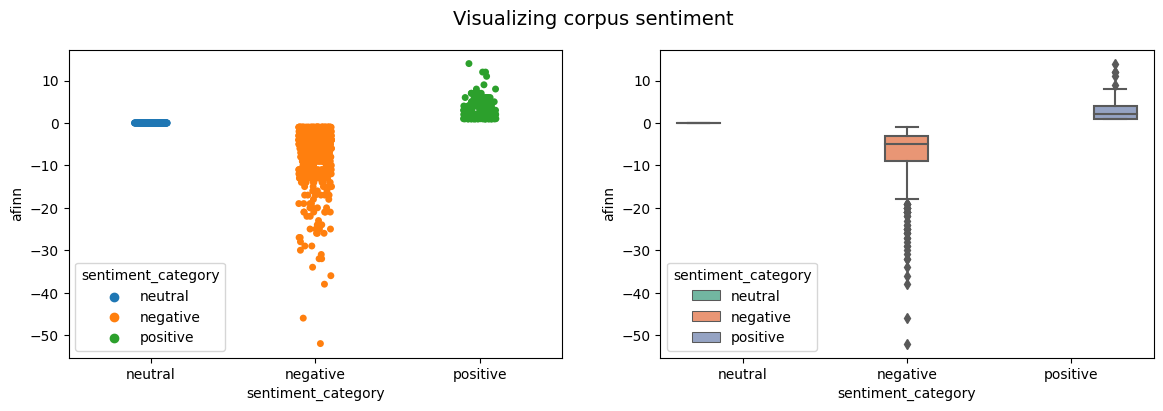

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='sentiment_category', y="afinn",
                   hue='sentiment_category', data=data, ax=ax1)
bp = sns.boxplot(x='sentiment_category', y="afinn",
                 hue='sentiment_category', data=data, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing corpus sentiment', fontsize=14)

In [ ]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

list(swn.senti_synsets('breakdown'))

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[SentiSynset('dislocation.n.02'),
 SentiSynset('breakdown.n.02'),
 SentiSynset('breakdown.n.03'),
 SentiSynset('breakdown.n.04')]

In [ ]:
list(swn.senti_synsets('breakdown'))

breakdown = swn.senti_synset('breakdown.n.02')
print (wn.synset('breakdown.n.02').definition())
n=len(wn.synset('breakdown.n.02').examples())
print(n)
if(n>0):
    print(wn.synset('breakdown.n.02').examples()[0])
print(breakdown)

print(breakdown.pos_score())
print(breakdown.neg_score())
print(breakdown.obj_score())

a mental or physical breakdown
0
<breakdown.n.02: PosScore=0.125 NegScore=0.5>
0.125
0.5
0.375


In [ ]:
breakdown = swn.senti_synset('breakdown.n.03')
print (wn.synset('breakdown.n.03').definition())

print(breakdown)

breakdown = swn.senti_synset('breakdown.n.04')
print (wn.synset('breakdown.n.04').definition())

print(breakdown)

a cessation of normal operation
<breakdown.n.03: PosScore=0.0 NegScore=0.25>
an analysis into mutually exclusive categories
<breakdown.n.04: PosScore=0.0 NegScore=0.0>


In [ ]:
list(swn.senti_synsets('slow'))

[SentiSynset('decelerate.v.01'),
 SentiSynset('slow.v.02'),
 SentiSynset('slow.v.03'),
 SentiSynset('slow.a.01'),
 SentiSynset('slow.a.02'),
 SentiSynset('dense.s.04'),
 SentiSynset('slow.a.04'),
 SentiSynset('boring.s.01'),
 SentiSynset('dull.s.08'),
 SentiSynset('slowly.r.01'),
 SentiSynset('behind.r.03')]

In [ ]:
slowly = swn.senti_synsets('slow', 'a') # a adjective
for t in slowly:
    print(t)

<slow.a.01: PosScore=0.0 NegScore=0.0>
<slow.a.02: PosScore=0.0 NegScore=0.0>
<dense.s.04: PosScore=0.0 NegScore=0.25>
<slow.a.04: PosScore=0.0 NegScore=0.0>
<boring.s.01: PosScore=0.0 NegScore=0.25>
<dull.s.08: PosScore=0.0 NegScore=0.5>


In [ ]:
#Un proceso global con sentiWordnet

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd
file = ('/content/drive/MyDrive/Colab Notebooks/MORS 2324/dev_en.tsv')
data = pd.read_csv(file, delimiter='\t', usecols =["text","HS"])
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,text,HS
0,I swear I’m getting to places just in the nick...,0
1,I’m an immigrant — and Trump is right on immig...,0
2,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1
3,@DRUDGE_REPORT We have our own invasion issues...,1
4,Worker Charged With Sexually Molesting Eight C...,0


In [ ]:
pos=neg=obj=count=0

postagging = []

for tweets in data['text']:
    list = word_tokenize(tweets) #tokenizamos tweet
    postagging.append(nltk.pos_tag(list)) #y lo añadimos tras análisis gramatical a colección postagging

data['pos_tags'] = postagging #añadimos nueva columna con gramática a data

def penn_to_wn(tag): #conversión formato Penn a Sentiwordnet
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [ ]:
postagging

[[('I', 'PRP'),
  ('swear', 'VBP'),
  ('I', 'PRP'),
  ('’', 'VBP'),
  ('m', 'RB'),
  ('getting', 'VBG'),
  ('to', 'TO'),
  ('places', 'NNS'),
  ('just', 'RB'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('nick', 'NN'),
  ('of', 'IN'),
  ('time', 'NN'),
  ('!', '.'),
  ('It', 'PRP'),
  ('’', 'VBD'),
  ('s', 'JJ'),
  ('exhausting', 'VBG'),
  ('@', 'JJ'),
  ('Sam_Schulman', 'NNP'),
  ('RT', 'NNP'),
  ('@', 'NNP'),
  ('MaireadEvvoMc', 'NNP'),
  (':', ':'),
  ('Made', 'VBN'),
  ('your', 'PRP$'),
  ('bed', 'NN'),
  (',', ','),
  ('now', 'RB'),
  ('lie', 'VBZ'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('flea', 'NN'),
  ('pit', 'NN'),
  ('you', 'PRP'),
  ('created', 'VBD'),
  ("'Tourists", 'NNS'),
  ('go', 'VBP'),
  ('home', 'NN'),
  (',', ','),
  ('refugees', 'VBZ'),
  ('welcome', 'JJ'),
  ("'", "''"),
  (':', ':'),
  ('why', 'WRB'),
  ('Barcelona', 'NNP'),
  ('chose', 'VBD'),
  ('migrants', 'NNS'),
  ('over', 'IN'),
  ('visitors', 'NNS'),
  ('https', 'NNS'),
  (':', ':'),
  ('//t.co/gtLMcuFC5p', 'NN')],


In [ ]:
data.head()

,text,HS,pos_tags
0,I swear I’m getting to places just in the nick...,0,"[(I, PRP), (swear, VBP), (I, PRP), (’, VBP), (..."
1,I’m an immigrant — and Trump is right on immig...,0,"[(I, PRP), (’, VBP), (m, PDT), (an, DT), (immi..."
2,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,"[(#, #), (IllegalImmigrants, NNS), (#, #), (Il..."
3,@DRUDGE_REPORT We have our own invasion issues...,1,"[(@, JJ), (DRUDGE_REPORT, NNP), (We, PRP), (ha..."
4,Worker Charged With Sexually Molesting Eight C...,0,"[(Worker, NN), (Charged, VBN), (With, IN), (Se..."


In [ ]:
# Devuelve la lista de puntuación pos-neg-objetividad. Pero devuelve una lista vacía si no está presente en sentiwordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)

    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV): #limitamos a 3 categorías
        return []

    #Lematizacion
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset es un tipo especial de interfaz simple que está presente en NLTK para buscar palabras en WordNet.
    #Las instancias #Synset son agrupaciones de palabras sinónimos que expresan el mismo concepto.
    #Algunas de las palabras tienen solo un Synset y otras tienen varios.
    synsets = wn.synsets(word, pos=wn_tag) #desambiguo
    if not synsets:
        return []

    # Tomamos la primera acepción, la más común
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name()) #y la buscamos en sentiwordnet

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0

In [ ]:
lemmatizer = WordNetLemmatizer()

senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #la puntuación positiva se almacena en la segunda posición
            neg = neg + score[2]  #la puntuación negativa se almacena en la tercera posición
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0

data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head)

0      0.500
1     -0.125
2      1.000
3      0.125
4     -0.125
       ...  
995    0.000
996   -0.500
997   -2.375
998   -1.500
999    0.000
Name: senti_score, Length: 1000, dtype: float64
<bound method NDFrame.head of                                                   text  HS  \
0    I swear I’m getting to places just in the nick...   0   
1    I’m an immigrant — and Trump is right on immig...   0   
2    #IllegalImmigrants #IllegalAliens #ElectoralSy...   1   
3    @DRUDGE_REPORT We have our own invasion issues...   1   
4    Worker Charged With Sexually Molesting Eight C...   0   
..                                                 ...  ..   
995       @SamEnvers you unfollowed me? Fuck you pussy   0   
996  @DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...   1   
997  @2beornotbeing Honey, as a fellow white chick,...   0   
998  I hate bitches who talk about niggaz with kids...   1   
999  @AnnCoulter @DonaldJTrumpJr You won the" life ...   1   

                                  

In [ ]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]>= 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall_Sentiment']=overall

data.head(10)

,text,HS,pos_tags,senti_score,Overall_Sentiment
0,I swear I’m getting to places just in the nick...,0,"[(I, PRP), (swear, VBP), (I, PRP), (’, VBP), (...",0.500,Positive
1,I’m an immigrant — and Trump is right on immig...,0,"[(I, PRP), (’, VBP), (m, PDT), (an, DT), (immi...",-0.125,Negative
2,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,"[(#, #), (IllegalImmigrants, NNS), (#, #), (Il...",1.000,Positive
3,@DRUDGE_REPORT We have our own invasion issues...,1,"[(@, JJ), (DRUDGE_REPORT, NNP), (We, PRP), (ha...",0.125,Positive
4,Worker Charged With Sexually Molesting Eight C...,0,"[(Worker, NN), (Charged, VBN), (With, IN), (Se...",-0.125,Negative
5,"UN picks refugees for UK, picks mostly Syrian ...",0,"[(UN, NN), (picks, NNS), (refugees, NNS), (for...",0.000,Neutral
6,@htTweets Delhi will be much better under Prez...,0,"[(@, JJ), (htTweets, NNS), (Delhi, NNP), (will...",1.500,Positive
7,Global Compact on Migration moves forward http...,0,"[(Global, NNP), (Compact, NNP), (on, IN), (Mig...",0.250,Positive
8,"Violence toward tourists in Barcelona, Spain -...",0,"[(Violence, NNP), (toward, IN), (tourists, NNS...",-0.250,Negative
9,Immigration decline costing UK economy billion...,0,"[(Immigration, NNP), (decline, NN), (costing, ...",-0.250,Negative


In [ ]:
data.groupby(by=['Overall_Sentiment']).describe()

HS                                               \
                   count      mean       std  min  25%  50%  75%  max   
Overall_Sentiment                                                       
Negative           538.0  0.492565  0.500410  0.0  0.0  0.0  1.0  1.0   
Neutral            198.0  0.378788  0.486315  0.0  0.0  0.0  1.0  1.0   
Positive           264.0  0.329545  0.470941  0.0  0.0  0.0  1.0  1.0   

                  senti_score                                                 \
                        count      mean       std    min   25%    50%    75%   
Overall_Sentiment                                                              
Negative                538.0 -0.771716  0.634880 -3.612 -1.00 -0.625 -0.250   
Neutral                 198.0  0.000000  0.000000  0.000  0.00  0.000  0.000   
Positive                264.0  0.531723  0.495943  0.125  0.25  0.375  0.625   

                          
                     max  
Overall_Sentiment         
Negative          -0.112  
Neutral            0.000  
Positive           3.250

In [ ]:
#VADER

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [ ]:
!pip install sentistrength

In [ ]:
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath("/content/drive/MyDrive/Colab Notebooks/MORS 2324/lexiconESP/SentiStrengthCom.jar")
senti.setSentiStrengthLanguageFolderPath("/content/drive/MyDrive/Colab Notebooks/MORS 2324/lexiconESP/SpanishSentiData")
result = senti.getSentiment('Eres un idiota!')
print(result)

result = senti.getSentiment('Te amo!')
print(result)

[-4]
[4]


In [ ]:
#Y ahora un poquito de EVALUACION

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)



array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
confusion=pd.DataFrame(confusion_matrix(y_true, y_pred))
display(confusion)

,0,1,2
0,2,0,0
1,0,0,1
2,1,0,2


<Axes: >

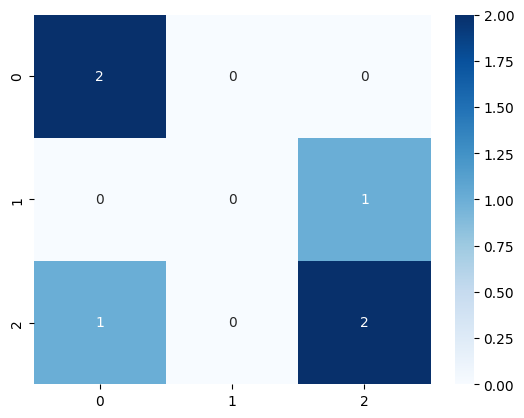

In [ ]:
sns.heatmap(confusion,annot=True,cmap="Blues")

In [ ]:
y_true = ["gato", "perro", "gato", "gato", "perro", "pajaro"]
y_pred = ["perro", "perro", "gato", "gato", "perro", "gato"]

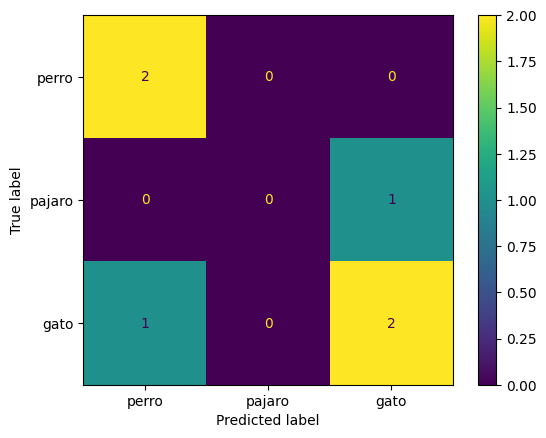

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=["perro", "pajaro", "gato"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["perro", "pajaro", "gato"])

disp.plot()